In [116]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

Из примера, который был на официальном сайте

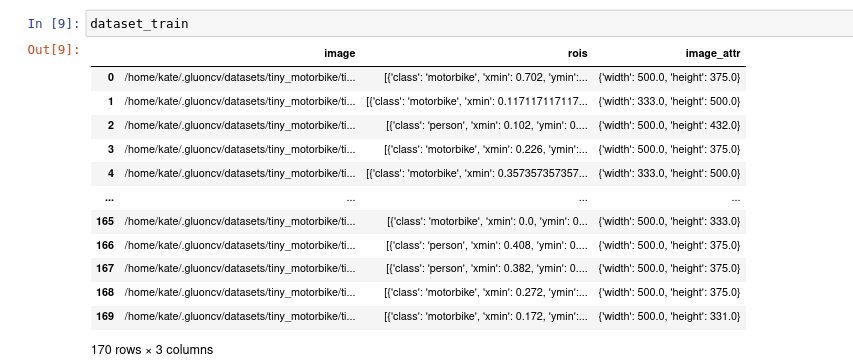

https://auto.gluon.ai/dev/tutorials/object_detection/beginner.html#sec-object-detection-quick

In [117]:
base_path = '/home/kate/PycharmProjects/object_detection/archive/'

In [118]:
folders = os.listdir(base_path)

In [119]:
folders

['train_zip', 'test_zip']

In [66]:
train_files = os.listdir(base_path+folders[0]+'/'+'train'+'/') 

In [67]:
directory = base_path+folders[0]+'/'+'train'+'/'

In [68]:
train_images = filter(lambda x: x.endswith('.jpg'), train_files) 

In [69]:
xml_files = filter(lambda x: x.endswith('.xml'), train_files) 

In [70]:
data_xml_files = pd.DataFrame(xml_files)

In [71]:
data_xml_files = list(data_xml_files[0])

In [72]:
from xml.etree import ElementTree as et

In [73]:
labels = []
difficult = []
i = 0
dictionary = dict()
dict_image_rois = dict()
a = []

for k in range(len(data_xml_files)):
    name = data_xml_files[k]
    annot_path = os.path.join(directory, name)
    tree = et.parse(os.path.join(directory, name))
    root = tree.getroot()
    # box coordinates for xml files are extracted and corrected for image size given
    for member in root.findall('object'):
        i+=1
        label = member.find('name').text

        difficult = int(member.find('difficult').text)

        # bounding box
        xmin = int(member.find('bndbox').find('xmin').text)
        xmax = int(member.find('bndbox').find('xmax').text)

        ymin = int(member.find('bndbox').find('ymin').text)
        ymax = int(member.find('bndbox').find('ymax').text)

        
        annot_path= annot_path.replace('xml', 'jpg')
        dictionary = {'class': label,
                      'xmin': xmin, 
                      'ymin': ymin,
                      'xmax': xmax,
                      'ymax': ymax,
                      'difficult': difficult}
        a.append(dictionary)
        
    dict_image_rois[annot_path] = a
    a = []

{'class': 'motorbike',
  'xmin': 0.702,
  'ymin': 0.36533333333333334,
  'xmax': 0.998,
  'ymax': 0.9973333333333333,
  'difficult': 0}

In [74]:
image_rois = pd.DataFrame(dict_image_rois.items())

In [75]:
image_rois

,0,1
0,/home/kate/PycharmProjects/object_detection/ar...,"[{'class': 'orange', 'xmin': 38, 'ymin': 1, 'x..."
1,/home/kate/PycharmProjects/object_detection/ar...,"[{'class': 'orange', 'xmin': 78, 'ymin': 79, '..."
2,/home/kate/PycharmProjects/object_detection/ar...,"[{'class': 'banana', 'xmin': 180, 'ymin': 161,..."
3,/home/kate/PycharmProjects/object_detection/ar...,"[{'class': 'banana', 'xmin': 470, 'ymin': 161,..."
4,/home/kate/PycharmProjects/object_detection/ar...,"[{'class': 'apple', 'xmin': 39, 'ymin': 55, 'x..."
...,...,...
235,/home/kate/PycharmProjects/object_detection/ar...,"[{'class': 'apple', 'xmin': 25, 'ymin': 42, 'x..."
236,/home/kate/PycharmProjects/object_detection/ar...,"[{'class': 'orange', 'xmin': 130, 'ymin': 262,..."
237,/home/kate/PycharmProjects/object_detection/ar...,"[{'class': 'banana', 'xmin': 38, 'ymin': 174, ..."
238,/home/kate/PycharmProjects/object_detection/ar...,"[{'class': 'banana', 'xmin': 27, 'ymin': 72, '..."


In [76]:
image_rois = image_rois.rename(columns={0: "image", 1: "rois"})

In [77]:
image_rois

,image,rois
0,/home/kate/PycharmProjects/object_detection/ar...,"[{'class': 'orange', 'xmin': 38, 'ymin': 1, 'x..."
1,/home/kate/PycharmProjects/object_detection/ar...,"[{'class': 'orange', 'xmin': 78, 'ymin': 79, '..."
2,/home/kate/PycharmProjects/object_detection/ar...,"[{'class': 'banana', 'xmin': 180, 'ymin': 161,..."
3,/home/kate/PycharmProjects/object_detection/ar...,"[{'class': 'banana', 'xmin': 470, 'ymin': 161,..."
4,/home/kate/PycharmProjects/object_detection/ar...,"[{'class': 'apple', 'xmin': 39, 'ymin': 55, 'x..."
...,...,...
235,/home/kate/PycharmProjects/object_detection/ar...,"[{'class': 'apple', 'xmin': 25, 'ymin': 42, 'x..."
236,/home/kate/PycharmProjects/object_detection/ar...,"[{'class': 'orange', 'xmin': 130, 'ymin': 262,..."
237,/home/kate/PycharmProjects/object_detection/ar...,"[{'class': 'banana', 'xmin': 38, 'ymin': 174, ..."
238,/home/kate/PycharmProjects/object_detection/ar...,"[{'class': 'banana', 'xmin': 27, 'ymin': 72, '..."


In [78]:
labels = []
difficult = []
i = 0
dictionary = dict()
dict_image_attr = dict()
a = []

for k in range(len(data_xml_files)):
    dictionary = dict()
    name = data_xml_files[k]
    annot_path = os.path.join(directory, name)
    tree = et.parse(os.path.join(directory, name))
    root = tree.getroot()
    for member in root.findall('size'):
        # image size 
        width = int(member.find('width').text)
        height = int(member.find('height').text)

        dictionary = {'width': width,
                      'height': height}
        
    annot_path= annot_path.replace('xml', 'jpg')   
    dict_image_attr[annot_path] = dictionary
    

In [80]:
image_attr = pd.DataFrame(dict_image_attr.items())

In [81]:
image_attr

,0,1
0,/home/kate/PycharmProjects/object_detection/ar...,"{'width': 600, 'height': 320}"
1,/home/kate/PycharmProjects/object_detection/ar...,"{'width': 350, 'height': 350}"
2,/home/kate/PycharmProjects/object_detection/ar...,"{'width': 768, 'height': 511}"
3,/home/kate/PycharmProjects/object_detection/ar...,"{'width': 1199, 'height': 674}"
4,/home/kate/PycharmProjects/object_detection/ar...,"{'width': 0, 'height': 0}"
...,...,...
235,/home/kate/PycharmProjects/object_detection/ar...,"{'width': 0, 'height': 0}"
236,/home/kate/PycharmProjects/object_detection/ar...,"{'width': 800, 'height': 533}"
237,/home/kate/PycharmProjects/object_detection/ar...,"{'width': 600, 'height': 500}"
238,/home/kate/PycharmProjects/object_detection/ar...,"{'width': 640, 'height': 364}"


In [82]:
image_attr = image_attr.rename(columns={0: "image", 1: "image_attr"})

In [83]:
image_attr

,image,image_attr
0,/home/kate/PycharmProjects/object_detection/ar...,"{'width': 600, 'height': 320}"
1,/home/kate/PycharmProjects/object_detection/ar...,"{'width': 350, 'height': 350}"
2,/home/kate/PycharmProjects/object_detection/ar...,"{'width': 768, 'height': 511}"
3,/home/kate/PycharmProjects/object_detection/ar...,"{'width': 1199, 'height': 674}"
4,/home/kate/PycharmProjects/object_detection/ar...,"{'width': 0, 'height': 0}"
...,...,...
235,/home/kate/PycharmProjects/object_detection/ar...,"{'width': 0, 'height': 0}"
236,/home/kate/PycharmProjects/object_detection/ar...,"{'width': 800, 'height': 533}"
237,/home/kate/PycharmProjects/object_detection/ar...,"{'width': 600, 'height': 500}"
238,/home/kate/PycharmProjects/object_detection/ar...,"{'width': 640, 'height': 364}"


In [84]:
df = pd.merge(image_rois,image_attr[['image','image_attr']],on='image', how='right')

In [113]:
df.rois[20]

[{'class': 'banana',
  'xmin': 17,
  'ymin': 1,
  'xmax': 1590,
  'ymax': 624,
  'difficult': 0}]

In [114]:
df = df.head(20)

In [91]:
df.to_csv('data.csv')

In [86]:
import autogluon.core as ag
from autogluon.vision import ObjectDetector

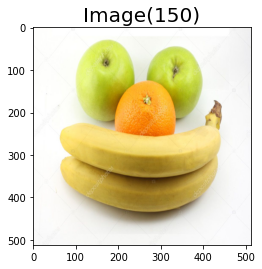

In [29]:
dataset = ObjectDetector.Dataset(data, classes=data['class'].unique().tolist())
dataset.show_images(nsample=1, ncol=1)

In [115]:
time_limit = 60*30  # at most 0.5 hour
detector = ObjectDetector()
hyperparameters = {'epochs': 2, 'batch_size': 6}
hyperparameter_tune_kwargs={'num_trials': 2}
detector.fit(df, time_limit=time_limit, hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs)

In a future release ObjectDetector may be entirely reworked to use Torch as a backend.
This future change will likely be API breaking.Users should ensure they update their code that depends on ObjectDetector when upgrading to future AutoGluon releases.
For more information, refer to ObjectDetector refactor GitHub issue: https://github.com/awslabs/autogluon/issues/1559



AssertionError: key `class` required in `rois`